# Introduction

Blablaba

# Data Analysis and Visualization

## Importing Necessary Packages and Reading Original Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("EVChargingStationUsage.csv")

C:\Users\phill\AppData\Local\Temp\ipykernel_18884\2665056436.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("EVChargingStationUsage.csv")


## Overview and Data Cleaning

To provide a quick overview of the data, the first and last five rows and all columns of the original dataframe are displayed:

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,City,State/Province,Postal Code,Country,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,Palo Alto,California,94301,United States,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,1.841000,0.773,0.231,Level 2,2,J1772,344261.0,275 Cambridge Ave,Palo Alto,California,94306,United States,37.428623,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,12.744000,5.352,1.599,Level 2,2,J1772,104427.0,520 Webster St,Palo Alto,California,94301,United States,37.448284,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,29.665000,12.459,3.723,Level 2,1,J1772,2884001.0,3700 Middlefield Rd,Palo Alto,California,94303,United States,37.422104,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,11.976000,5.030,1.503,Level 2,1,J1772,104427.0,520 Webster St,Palo Alto,California,94301,United States,37.448284,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


The original dataframe includes 259415 rows (observations) and 33 columns (variables). The first observation was on the 29th of july 2011 and the last observation was on the 31st of december 2020. Checking basic information regarding the variables in the original dataframe:

In [4]:
df.info() # Shows Column number, name, non-null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

9 of the variables are floats, 3 are integers and 21 are objects. It can be seen that not all variables have 259415 non-null values, so we check the number number of unique values and missing values for each column:

In [5]:
print(pd.DataFrame({"Unique Values": df.nunique(),"Missing Values": df.isnull().sum()}))

                                 Unique Values  Missing Values
Station Name                                47               0
MAC Address                                 83               0
Org Name                                     2               0
Start Date                              244798               0
Start Time Zone                              3               0
End Date                                244159               0
End Time Zone                                3               0
Transaction Date (Pacific Time)         240905             209
Total Duration (hh:mm:ss)                31025               0
Charging Time (hh:mm:ss)                 22473               0
Energy (kWh)                            118061               0
GHG Savings (kg)                         15535               0
Gasoline Savings (gallons)                6333               0
Port Type                                    2               9
Port Number                                  2         

In order to visualize what values are missing here is a plot where it can seen which variables are missing for which rows:

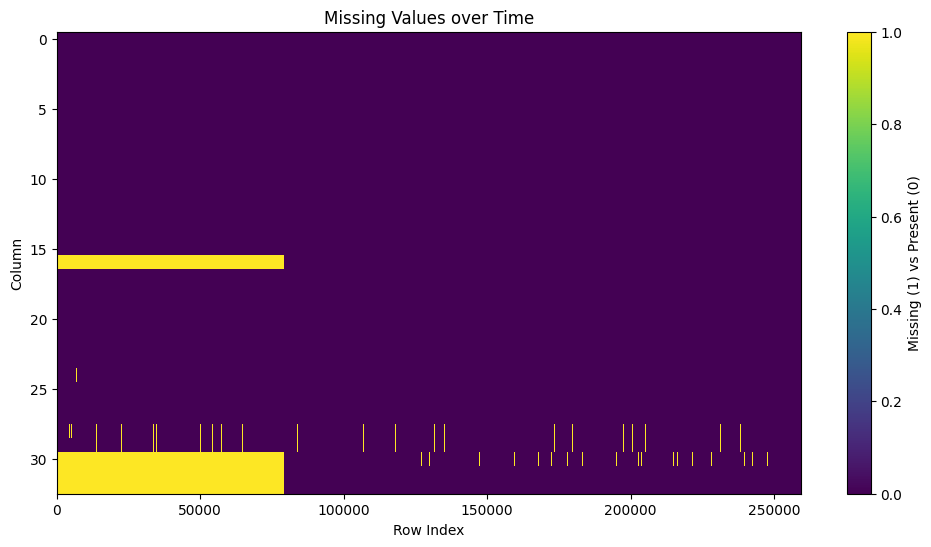

In [6]:
# Plot missing values over time
plt.figure(figsize=(12, 6))
plt.imshow(df.isnull().T, aspect='auto', cmap='viridis', interpolation='none')
plt.colorbar(label="Missing (1) vs Present (0)")
plt.xlabel("Row Index")
plt.ylabel("Column")
plt.title("Missing Values over Time")
plt.show()

EVSE ID, County, System S/N and Model Number are all systematically missing up to and including row 78948. Other missing values are less frequent and seem to be random. Checking date of row 78948 to see when they started recording EVSE ID, County and System I/D.

In [7]:
record_start_date, record_start_time_zone = df.iloc[78948][['Start Date', 'Start Time Zone']]

print("EVSE ID, County and System S/N were recorded from the following date:",record_start_date,record_start_time_zone)

EVSE ID, County and System S/N were recorded from the following date: 8/1/2016 5:21 PDT


The systematically missing values are likely not from any variables that will become particularly important later in the project, so dropping the rows with missing values seems excessive as it would remove roughly all data from the first 5 years of the dataframe. Rows that should be dropped however are duplicates, if there are any:

In [8]:
print("There are",df.duplicated().sum(),"duplicated rows")

There are 4 duplicated rows


These duplicated rows will be dropped. When looking at the table with unique values and missing values we see that City, State/Province and Country only have one unique value, meaning we can drop these columns from the dataframe. Next we check columns that only have a few unique values:

In [9]:
print("Org Name:",df['Org Name'].unique())
print("Start Time Zone:",df['Start Time Zone'].unique())
print("End Time Zone:",df['End Time Zone'].unique())
print("Port Type:",df['Port Type'].unique())
print("Port Number:",df['Port Number'].unique())
print("Plug Type:",df['Plug Type'].unique())
print("Postal Code:",df['Postal Code'].unique())
print("Currency:",df['Currency'].unique())
print("County:",df['County'].unique())

Org Name: ['City of Palo Alto' 'City of Palo Alto ']
Start Time Zone: ['PDT' 'PST' 'UTC']
End Time Zone: ['PDT' 'PST' 'UTC']
Port Type: ['Level 2' 'Level 1' nan]
Port Number: [2 1]
Plug Type: ['J1772' 'NEMA 5-20R']
Postal Code: [94301 94303 94306]
Currency: ['USD' nan 'EUR' 'MXN' 'CAD']
County: [nan 'Santa Clara County' 'San Mateo County']


Org Name has two unique values which are actually the same so this column can also be dropped. We see that there are different currencies. These should be dealt with so the fee variable is accurate:

In [10]:
print(f"Number of rows with Currency 'MXN', 'EUR', or 'CAD': {df['Currency'].isin(['MXN', 'EUR', 'CAD']).sum()}")

Number of rows with Currency 'MXN', 'EUR', or 'CAD': 14


There are so few rows with currencies other than USD that we might as well drop them instead of converting them to USD. Since there are only 1788 rows missing currency, these will also be dropped. After these actions all fees wil be in USD, which means we can also drop the currency column. Next we will check if there are any rows where charging time exceeds total duration:

In [11]:
# Create 'Charging Time' and 'Total Duration' variables with seconds as the unit
charging_time_seconds = pd.to_timedelta(df['Charging Time (hh:mm:ss)'], errors='coerce').dt.total_seconds()
total_duration_seconds = pd.to_timedelta(df['Total Duration (hh:mm:ss)'], errors='coerce').dt.total_seconds()

# Number of rows where Charging Time > Total Duration
invalid_rows_count = (charging_time_seconds > total_duration_seconds).sum()

# Output the result
print(f"Number of rows where Charging Time > Total Duration: {invalid_rows_count}")

Number of rows where Charging Time > Total Duration: 45


Obviously it should not be possible for charging time to exceed total duration, so these rows will be dropped. Dropping afforementioned rows and columns and defining new cleaner dataframe:

In [13]:
df0 = (
    df.drop_duplicates()  # Remove duplicate rows
    .dropna(subset=['Currency'])  # Drop rows with NaN in 'Currency'
    .loc[~df['Currency'].isin(['MXN', 'EUR', 'CAD'])]  # Exclude specific currencies
    .loc[charging_time_seconds <= total_duration_seconds]  # Only include rows where charging time <= total duration
    .drop(columns=['City', 'State/Province', 'Country', 'Org Name','Currency'])  # Drop unnecessary columns
    .rename(columns={'Fee': 'Fee (USD)'})  # Rename 'Fee' to 'Fee (USD)' now that all fees are of the same currency
)
df0 # Quick overview of new cleaner dataframe

,Station Name,MAC Address,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Type,Port Number,Plug Type,EVSE ID,Address 1,Postal Code,Latitude,Longitude,Fee (USD),Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,6.249457,2.625,0.784,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,0.106588,0.045,0.013,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,14.951777,6.280,1.876,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,7.159643,3.007,0.899,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,1.957765,0.822,0.246,Level 2,2,J1772,NaN,250 Hamilton Ave,94301,37.444572,-122.160309,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,1.841000,0.773,0.231,Level 2,2,J1772,344261.0,275 Cambridge Ave,94306,37.428623,-122.144043,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,12.744000,5.352,1.599,Level 2,2,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,29.665000,12.459,3.723,Level 2,1,J1772,2884001.0,3700 Middlefield Rd,94303,37.422104,-122.113510,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,11.976000,5.030,1.503,Level 2,1,J1772,104427.0,520 Webster St,94301,37.448284,-122.158272,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


The dataframe now consists of 257566 rows and 28 columns.

## Descriptive Analysis and Visualization of the Data

When glancing over the dataframe it immediately becomes obvious that the fee was 0 for some time. It would be interesting to see when stations started charging a fee.

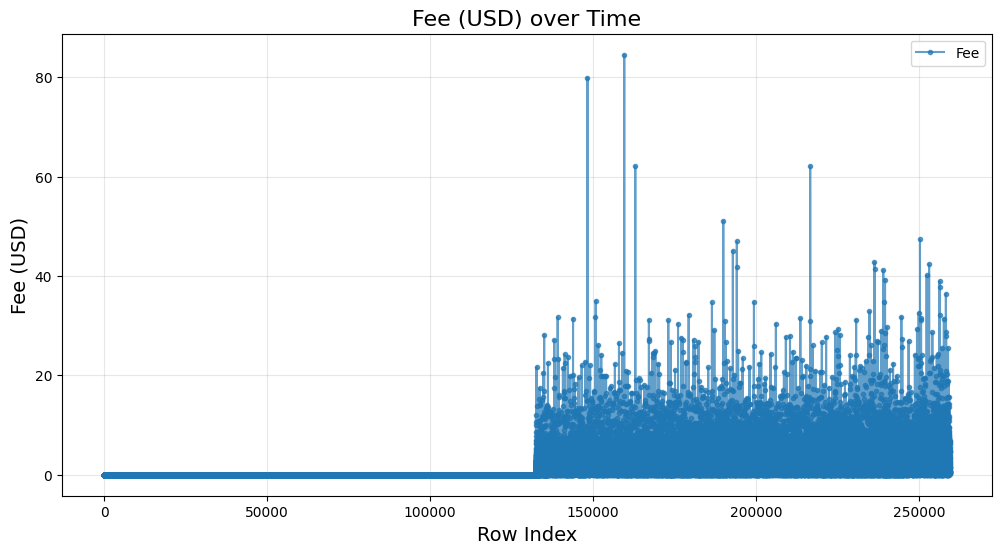

In [14]:
# Plot of Fee over Time
plt.figure(figsize=(12, 6))
plt.plot(df0.index, df0['Fee (USD)'], marker='o', linestyle='-', markersize=3, alpha=0.7, label='Fee')
plt.title("Fee (USD) over Time", fontsize=16)
plt.xlabel("Row Index", fontsize=14)
plt.ylabel("Fee (USD)", fontsize=14)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

Aproximately half of all observations have zero fee. The date where stations started charging a fee:

In [15]:
# Filter rows where Fee > 0
fee_df0 = df0[df0['Fee (USD)'] > 0]

# Start Date and Start Time Zone of the first row with Fee > 0
fee_start_date, fee_start_time_zone = fee_df0.iloc[0][['Start Date', 'Start Time Zone']]

print("The first fee was charged on the following date:",fee_start_date,fee_start_time_zone)

The first fee was charged on the following date: 8/1/2017 5:16 PDT


So for the first six years or so there was no fee for charging. Next we create a correlation matrix to get an idea of correlations between every numeric variable. Total Duration and Charging Time are changed to seconds so they can be included in the correlation matrix:

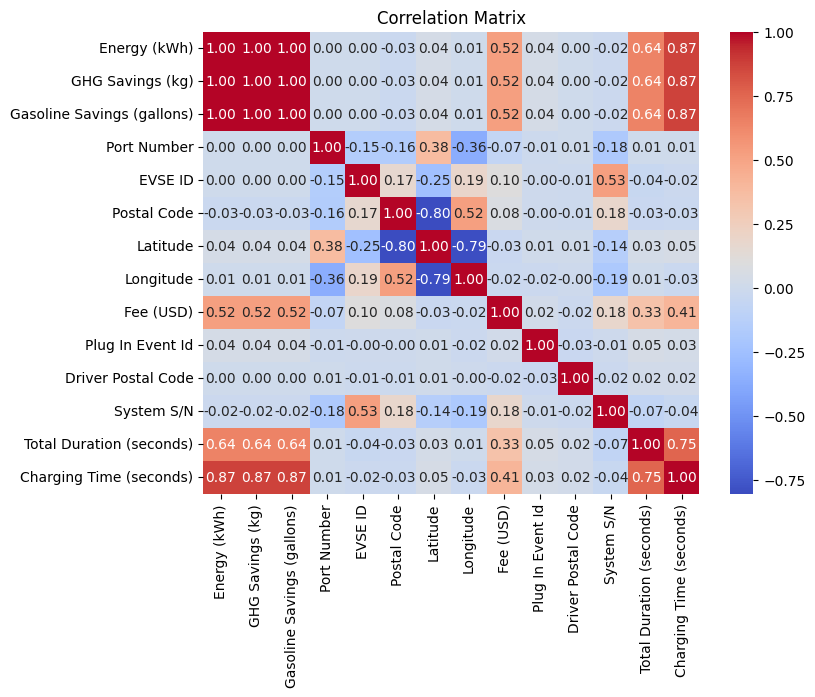

In [16]:
# Create a new DataFrame with only numeric columns (float64 and int64) from the original df
numeric_df0 = df0.select_dtypes(include=['float64', 'int64'])

# Convert 'Total Duration' and 'Charging Time' to seconds (or minutes)
numeric_df0['Total Duration (seconds)'] = total_duration_seconds
numeric_df0['Charging Time (seconds)'] = charging_time_seconds

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df0.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Most of these correlations make sense. I suspect that if we check correlation between fee and energy, total duration and charging time in the dataframe which only includes non zero fees these values would be closer to one. As the correlations between energy, ghg savings and gasoline savings are all 1 comparing the other variables to only energy is sufficient.

In [17]:
# Compute the correlation between specific columns, but only for non-zero fees
cor_fee_energy = fee_df0['Fee (USD)'].corr(df0['Energy (kWh)'])
cor_fee_totalduration = fee_df0['Fee (USD)'].corr(numeric_df0['Total Duration (seconds)'])
cor_fee_chargingtime = fee_df0['Fee (USD)'].corr(numeric_df0['Charging Time (seconds)'])

# Display the result
print(f"The correlation between 'Fee (USD)' and 'Energy (kWh)' is: {cor_fee_energy}")
print(f"The correlation between 'Fee (USD)' and 'Total Duration (seconds)' is: {cor_fee_totalduration}")
print(f"The correlation between 'Fee (USD)' and 'Charging Time (seconds)' is: {cor_fee_chargingtime}")

The correlation between 'Fee (USD)' and 'Energy (kWh)' is: 0.8293086425555678
The correlation between 'Fee (USD)' and 'Total Duration (seconds)' is: 0.7846173285140415
The correlation between 'Fee (USD)' and 'Charging Time (seconds)' is: 0.7731820809137556


As suspected the aforementioned correlations are closer to one in the dataframe with only non zero fees. Below is a table with some statistical information on the numerical dataframe:

In [18]:
numeric_df0.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee (USD),Plug In Event Id,Driver Postal Code,System S/N,Total Duration (seconds),Charging Time (seconds)
count,257566.000000,257566.000000,257566.000000,257566.000000,1.803340e+05,257566.000000,257566.000000,257566.000000,257566.000000,2.575660e+05,249571.000000,1.803340e+05,257566.000000,257566.000000
mean,8.556996,3.593938,1.073902,1.589519,1.463375e+05,94302.324616,37.439528,-122.151201,1.103873,1.183506e+08,94170.338064,1.443847e+11,8956.537284,7197.572929
std,7.185420,3.017876,0.901771,0.491922,2.430463e+05,1.945349,0.009640,0.015405,1.928404,4.052195e+08,4247.844696,2.483402e+10,7967.915571,4972.266170
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11,60.000000,6.000000
25%,3.799156,1.596000,0.477000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.589000e+03,94087.000000,1.231100e+11,4221.000000,3749.000000
50%,6.878000,2.889000,0.863000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.593000e+03,94304.000000,1.427410e+11,7526.000000,6545.500000
75%,11.475571,4.820000,1.440000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.650000,6.350000e+03,94710.000000,1.705410e+11,11124.000000,9707.000000
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11,412341.000000,82555.000000


From the table we can derive several things. Port Number 2 is more common than 1, the fee was 0 for at least half the observations and while the means of total duration and charging time are relatively close, the standard deviation for total duration is significantly larger than it is for charging time. The most extreme observation for total duration is also more extreme than it is for charging time, while the quartiles are somewhat similar. To visualize this histograms and box plots are provided:

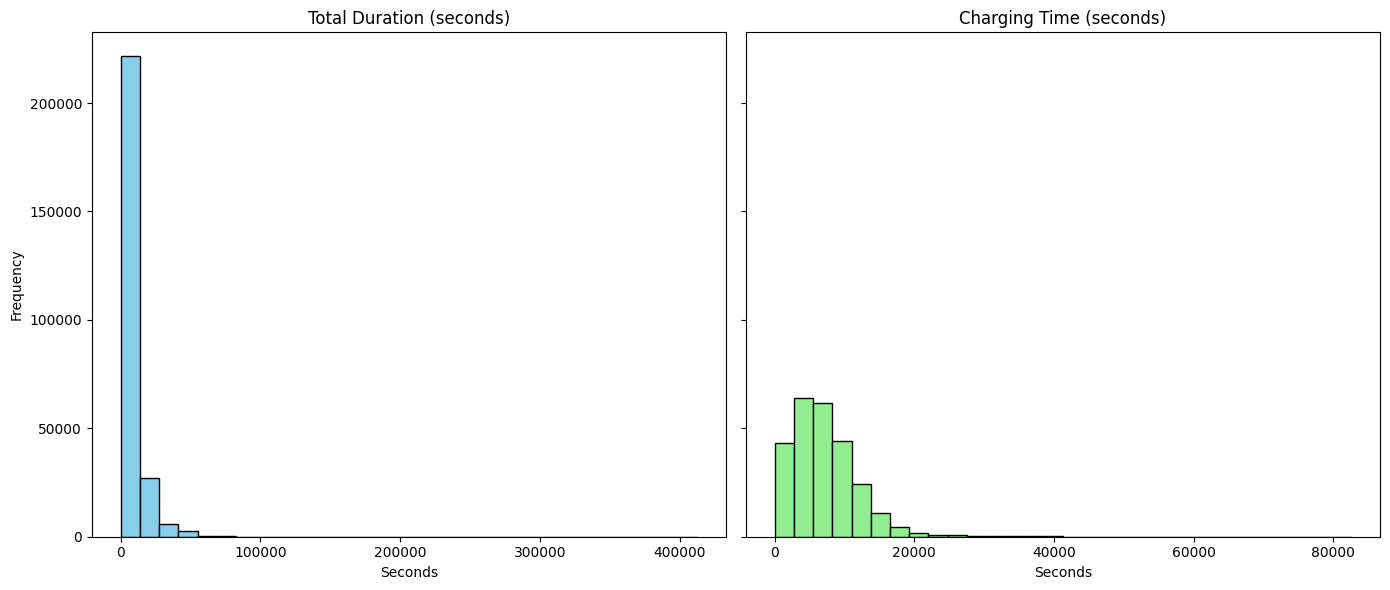

In [19]:
# Create subplots
figh, axesh = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot histogram for Total Duration
axesh[0].hist(numeric_df0['Total Duration (seconds)'], bins=30, color='skyblue', edgecolor='black')
axesh[0].set_title('Total Duration (seconds)')
axesh[0].set_xlabel('Seconds')
axesh[0].set_ylabel('Frequency')

# Plot histogram for Charging Time
axesh[1].hist(numeric_df0['Charging Time (seconds)'], bins=30, color='lightgreen', edgecolor='black')
axesh[1].set_title('Charging Time (seconds)')
axesh[1].set_xlabel('Seconds')

# Adjust layout
plt.tight_layout()
plt.show()

Blablabla histograms. Box plots:

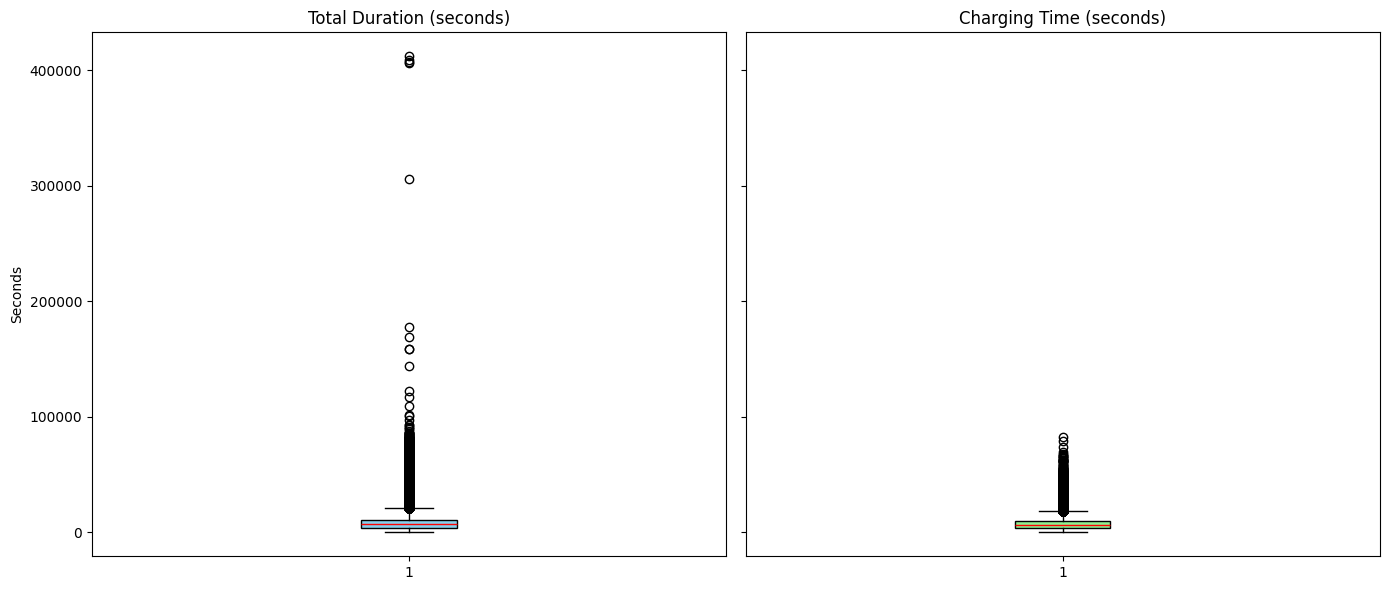

In [20]:
# Create subplots
figb, axesb = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot boxplot for Total Duration
axesb[0].boxplot(numeric_df0['Total Duration (seconds)'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axesb[0].set_title('Total Duration (seconds)')
axesb[0].set_ylabel('Seconds')

# Plot boxplot for Charging Time
axesb[1].boxplot(numeric_df0['Charging Time (seconds)'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axesb[1].set_title('Charging Time (seconds)')

# Adjust layout
plt.tight_layout()
plt.show()

The box plots are quite similar, which confirms the comments made based on the table before. From the table we saw that the most extreme value for total duration was significantly more extreme than it was for charging time, but now we also see that this is a general trend for total duration. Next it would be interesting to see how observations are distributed across the period of time of the dataframe:

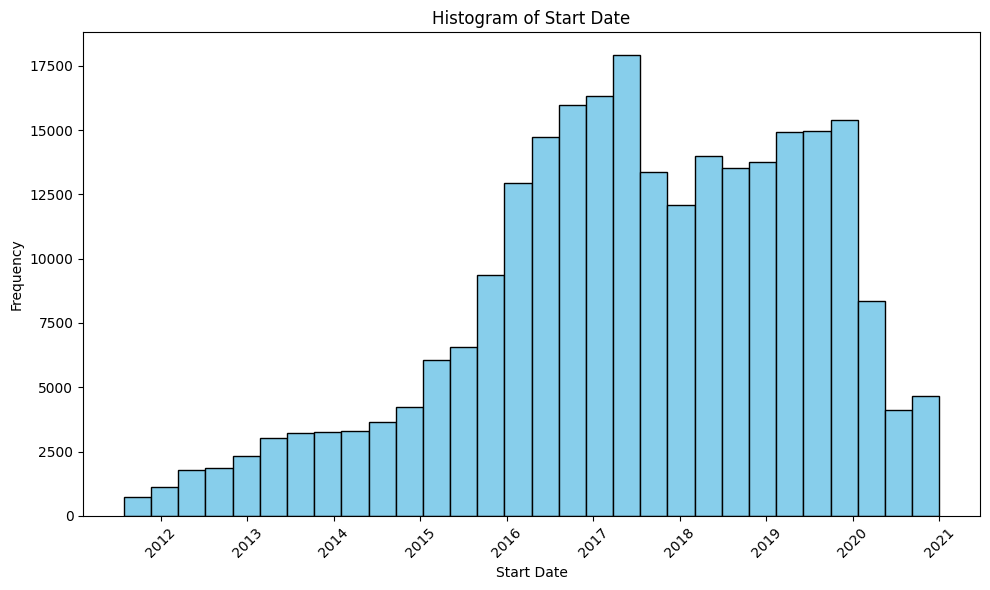

In [21]:
# Convert 'Start Date' to datetime format
start_date = pd.to_datetime(df0['Start Date'], errors='coerce')

# Plot histogram of 'Start Date'
plt.figure(figsize=(10, 6))
plt.hist(start_date, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Start Date')
plt.xlabel('Start Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most observations lie between 2016 and 2020. The increase around 2016 is likely due to electric vehicles becoming more common around this time and the steep fall off around 2020 is probably due to covid-19. Other variables which would be suitable to look at with histograms and box plots are Energy, GHG savings, Gasoline savings and Fee. I will only make the plots for Energy and Fee as Energy, GHG savings and gasoline savings all have a correlation of 1 so analyzing all of them would be redundant. First we make the histogram and box plot for fee (using the dataframe with only non-zero fees):

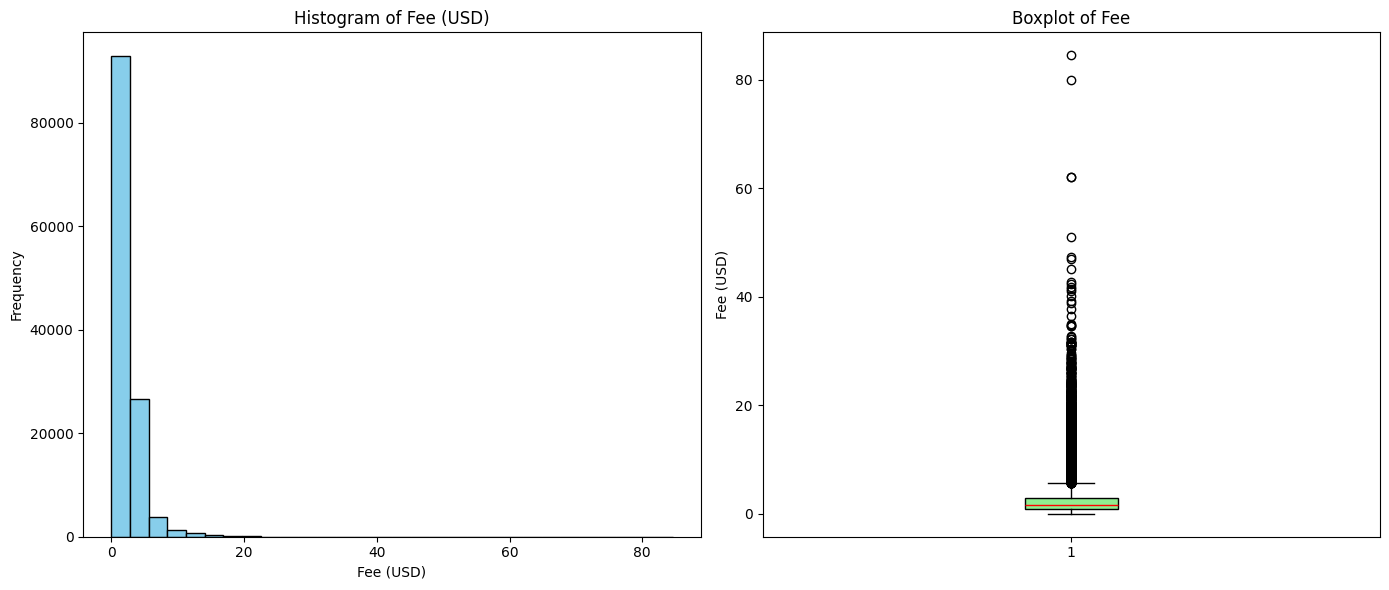

In [24]:
# Create subplots: 1 row, 2 columns
figf, axesf = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for Fee
axesf[0].hist(fee_df0['Fee (USD)'], bins=30, color='skyblue', edgecolor='black')
axesf[0].set_title('Histogram of Fee (USD)')
axesf[0].set_xlabel('Fee (USD)')
axesf[0].set_ylabel('Frequency')

# Plot boxplot for Fee
axesf[1].boxplot(fee_df0['Fee (USD)'], patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axesf[1].set_title('Boxplot of Fee')
axesf[1].set_ylabel('Fee (USD)')

# Adjust layout
plt.tight_layout()
plt.show()

Blablabla not really useful. Now for Energy:

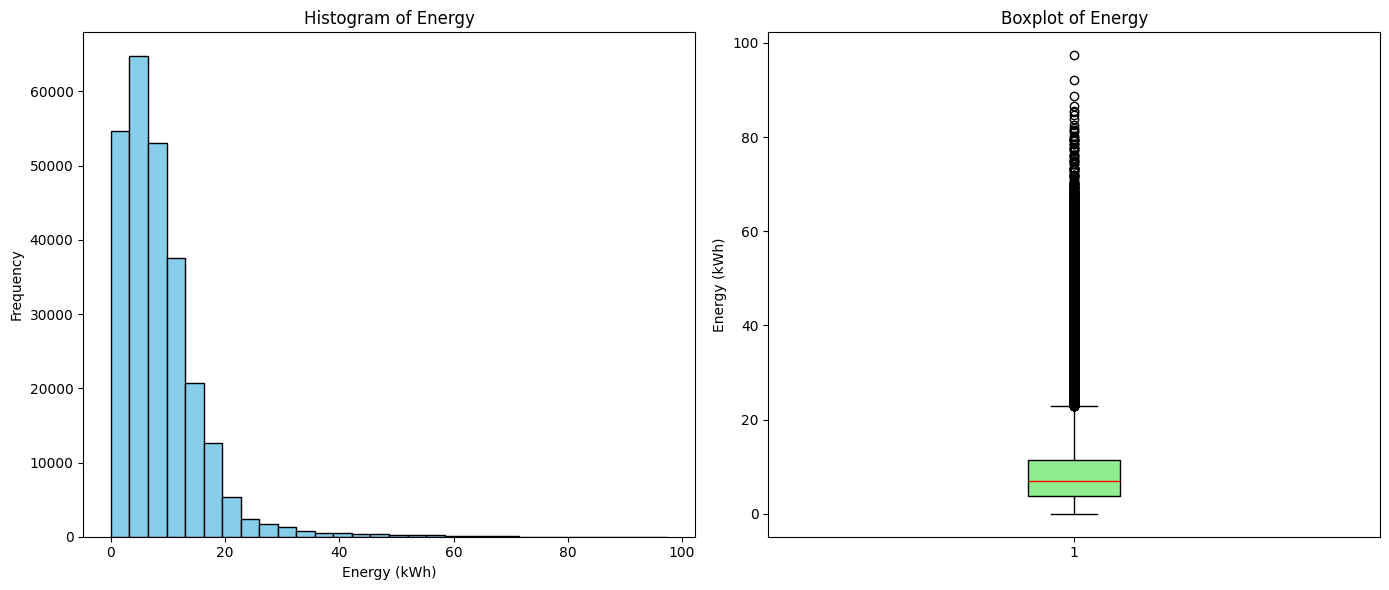

In [25]:
# Create subplots: 1 row, 2 columns
fige, axese = plt.subplots(1, 2, figsize=(14, 6))

# Plot histogram for Energy
axese[0].hist(df0['Energy (kWh)'].dropna(), bins=30, color='skyblue', edgecolor='black')
axese[0].set_title('Histogram of Energy')
axese[0].set_xlabel('Energy (kWh)')
axese[0].set_ylabel('Frequency')

# Plot boxplot for Energy
axese[1].boxplot(df0['Energy (kWh)'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='lightgreen', color='black'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='black'),
                capprops=dict(color='black'))
axese[1].set_title('Boxplot of Energy')
axese[1].set_ylabel('Energy (kWh)')

# Adjust layout
plt.tight_layout()
plt.show()

Once again there are a lot of outliers, however they are less extreme than for the other variables. The histogram and box plot for energy looks similar to those of charging time, which makes sense. Total duration and fee seem to be more extreme.